In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
P = 10000  # 本金
I = 0.05  # 年利率
i = I / 12  # 月利率
M = 12  # 月数

## 等额本金
每月还款额Fm=每月还款本金+每月还款利息。Pm+Rm

每月还款本金Pm=贷款总额/贷款月数 P/M。

每月还款利息Rm=贷款本金余额 * 贷款月利率 Pb * i（ 贷款月利率=年利率/12）。

贷款本金余额Pb=贷款总额-已还款月数 * 每月还款本金 P-m * Pm

In [3]:
def bj(M):
    for m in range(M):
        Pm = P / M  # 每月还款本金Fp=贷款总额P/贷款月数M
        Pb = P - m * Pm  # 贷款本金余额Pb=贷款总额P-已还款月数m*每月还款本金Fp
        Rm = Pb * i  # 每月还款利息Rm=贷款本金余额Pb*贷款月利率i
        Fm = Pm + Rm  # 每月还款额Fm=每月还款本金Pm+每月还款利息Rm
        Pe = Pb - Pm  # 期末余额Pe=贷款本金余额Pb-每月还款本金Pm
        # print('第%d月还款额：%f，还款本金：%f，还款利息，%f，期末余额：%f' % (m+1, Fm, Pm, Rm, Pb-Pm))
        result = (m + 1, Fm, Pm, Rm, Pb, Pe)
        yield result

In [4]:
for r in bj(M):
    print('第%d月还款额：%f，还款本金：%f，还款利息，%f，期初余额：%f，期末余额：%f' % r)

第1月还款额：875.000000，还款本金：833.333333，还款利息，41.666667，期初余额：10000.000000，期末余额：9166.666667
第2月还款额：871.527778，还款本金：833.333333，还款利息，38.194444，期初余额：9166.666667，期末余额：8333.333333
第3月还款额：868.055556，还款本金：833.333333，还款利息，34.722222，期初余额：8333.333333，期末余额：7500.000000
第4月还款额：864.583333，还款本金：833.333333，还款利息，31.250000，期初余额：7500.000000，期末余额：6666.666667
第5月还款额：861.111111，还款本金：833.333333，还款利息，27.777778，期初余额：6666.666667，期末余额：5833.333333
第6月还款额：857.638889，还款本金：833.333333，还款利息，24.305556，期初余额：5833.333333，期末余额：5000.000000
第7月还款额：854.166667，还款本金：833.333333，还款利息，20.833333，期初余额：5000.000000，期末余额：4166.666667
第8月还款额：850.694444，还款本金：833.333333，还款利息，17.361111，期初余额：4166.666667，期末余额：3333.333333
第9月还款额：847.222222，还款本金：833.333333，还款利息，13.888889，期初余额：3333.333333，期末余额：2500.000000
第10月还款额：843.750000，还款本金：833.333333，还款利息，10.416667，期初余额：2500.000000，期末余额：1666.666667
第11月还款额：840.277778，还款本金：833.333333，还款利息，6.944444，期初余额：1666.666667，期末余额：833.333333
第12月还款额：836.805556，还款本金：833.333333，还款利息，3.472222，期初余额：833.333333，期末余额：-0.000000


## 等额本息
本月还息=本月余额×月利率

本月还本=每月还款额-本月还息

每月还款额=[贷款本金×月利率×（1+月利率）^还款月数]÷[（1+月利率）^还款月数－1]

In [5]:
Fm = P * i * ((1 + i)**M) / (((1 + i)**M) - 1)
Fm

856.0748178846745

In [6]:
def bx(P, I, M):
    i = I / 12
    result = None
    Fm = P * i * ((1 + i)**M) / (((1 + i)**M) - 1)
    for m in range(M):
        if not result:  # 期初余额
            Pb = P  # 若不存在上期数据即首次运算，期初余额为本金
        else:
            Pb = result[-1]
        Rm = Pb * i  # 还息
        Pm = Fm - Rm  # 还本
        Pe = Pb - Pm  # 期末余额
        result = (m + 1, Fm, Pm, Rm, Pb, Pe)
        print('第%d月还款额：%f，还款本金：%f，还款利息，%f，期初余额：%f，期末余额：%f' % result)
        yield result

In [7]:
bx_df = pd.DataFrame(columns=['月份', '还款额', '还本', '还息', '初期余额', '末期余额'])

In [8]:
bx_lst = []
for r in bx(10000, 0.05, 6):
    bx_lst.append(r)
bx_df = pd.DataFrame(bx_lst, columns=['月份', '还款额', '还本', '还息', '期初余额', '期末余额'])
bx_df

第1月还款额：1691.056440，还款本金：1649.389774，还款利息，41.666667，期初余额：10000.000000，期末余额：8350.610226
第2月还款额：1691.056440，还款本金：1656.262231，还款利息，34.794209，期初余额：8350.610226，期末余额：6694.347995
第3月还款额：1691.056440，还款本金：1663.163324，还款利息，27.893117，期初余额：6694.347995，期末余额：5031.184672
第4月还款额：1691.056440，还款本金：1670.093171，还款利息，20.963269，期初余额：5031.184672，期末余额：3361.091501
第5月还款额：1691.056440，还款本金：1677.051892，还款利息，14.004548，期初余额：3361.091501，期末余额：1684.039609
第6月还款额：1691.056440，还款本金：1684.039609，还款利息，7.016832，期初余额：1684.039609，期末余额：0.000000


,月份,还款额,还本,还息,期初余额,期末余额
0,1,1691.05644,1649.389774,41.666667,10000.000000,8.350610e+03
1,2,1691.05644,1656.262231,34.794209,8350.610226,6.694348e+03
2,3,1691.05644,1663.163324,27.893117,6694.347995,5.031185e+03
3,4,1691.05644,1670.093171,20.963269,5031.184672,3.361092e+03
4,5,1691.05644,1677.051892,14.004548,3361.091501,1.684040e+03
5,6,1691.05644,1684.039609,7.016832,1684.039609,7.048584e-12


In [9]:
bx_df.set_index('月份', inplace=True)

In [10]:
bx_df

,还款额,还本,还息,期初余额,期末余额
月份,,,,,
1,1691.05644,1649.389774,41.666667,10000.000000,8.350610e+03
2,1691.05644,1656.262231,34.794209,8350.610226,6.694348e+03
3,1691.05644,1663.163324,27.893117,6694.347995,5.031185e+03
4,1691.05644,1670.093171,20.963269,5031.184672,3.361092e+03
5,1691.05644,1677.051892,14.004548,3361.091501,1.684040e+03
6,1691.05644,1684.039609,7.016832,1684.039609,7.048584e-12


## 等额本息-复投同利率等额本息 

In [39]:
def bxft(M, P, I, m=0, G=0):
    i = I / 12
    Fm = P * i * ((1 + i)**(M - m)) / (((1 + i)**(M - m)) - 1)
    # print('第%s月投资金额：%s，投资单期回款：%s，投资期末收益：%s' % (m+1, P, Fm, Fm*(M-m)-P))
    G = G + Fm * (M - m) - P
    m += 1
    if m < M and m > 1:
        return bxft(M, Fm + P, I, m, G)
    elif m <= 1:
        return bxft(M, Fm, I, m, G)


    # print('最终收益：%s' % G)
    return G

In [40]:
bxft(6, 10000, 0.085)

432.5974996289442

## 收益分析 

In [41]:
G = []
for m in np.arange(3, 37, 3):
    G.append(bxft(M=m, I=0.085, P=10000))

In [42]:
data = pd.DataFrame({'期数': np.arange(3, 37, 3), '收益': G})
data

,期数,收益
0,3,214.008762
1,6,432.597500
2,9,655.864227
3,12,883.909059
4,15,1116.834250
5,18,1354.744243
6,21,1597.745720
7,24,1845.947640
8,27,2099.461300
9,30,2358.400373


In [43]:
data['最终收益率'] = data['收益'] / 10000

In [44]:
data['年化收益率'] = (12 / data['期数']) * data['收益'] / 10000

In [45]:
data

,期数,收益,最终收益率,年化收益率
0,3,214.008762,0.021401,0.085604
1,6,432.597500,0.043260,0.086519
2,9,655.864227,0.065586,0.087449
3,12,883.909059,0.088391,0.088391
4,15,1116.834250,0.111683,0.089347
5,18,1354.744243,0.135474,0.090316
6,21,1597.745720,0.159775,0.091300
7,24,1845.947640,0.184595,0.092297
8,27,2099.461300,0.209946,0.093309
9,30,2358.400373,0.235840,0.094336


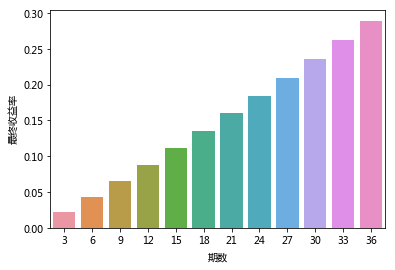

In [46]:
sns.barplot(data=data[['期数', '最终收益率']], x='期数', y='最终收益率')

In [49]:
data['最终收益率'].apply(bxft, args=(6,10000))

0      5652.425395
1      6403.695058
2      7270.445697
3      8272.332474
4      9432.603158
5     10778.782982
6     12343.490708
7     14165.409584
8     16290.440264
9     18773.066214
10    21677.965357
11    25081.904342
Name: 最终收益率, dtype: float64